# Single neuron Calcium Imaging

This notebook has the code to extract Calcium traces from the single neuron recordings on ZIM01.

In [1]:
#Unet
#import pckgs
import cv2
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re

import os
from natsort import natsorted
from imutils.src import imfunctions
import glob
from pathlib import Path
import shutil
import single_cell_imaging_functions as ca_image

Using TensorFlow backend.


### Option 1: Binarize using make_contour based binary

In [14]:
input_filepath='/scratch/zimmer/DanielM/BAG_RFP_max/2021-07-05_17-45-15_worm1_onfood-channel-0rfp_raw.btf'
output_filepath='/scratch/zimmer/DanielM/BAG_RFP_max/2021-07-05_17-45-15_worm1_onfood-channel-0-pco_camera1_binary.btf'
median_blur=3
lt=140
ht=255
contour_size=2000
tolerance=0.5
area_to_fill=100
imfunctions.make_contour_based_binary(input_filepath, output_filepath, median_blur, lt, ht, contour_size, tolerance, area_to_fill)

## option 1 for all files in a directory


In [2]:
input_path=Path('/scratch/zimmer/DanielM/ZIM443_RFP_max/')
output_path='/scratch/zimmer/DanielM'
file_extension='.btf'
add_to_name='_binary'

median_blur=3
lt=140
ht=255
contour_size=2000
tolerance=0.5
area_to_fill=100


for input_file in input_path.glob('*.btf'):
    #get new filenames
    outputpath_filename=ca_image.get_new_file_names(input_file,output_path,add_to_name,file_extension)
    #apply function
    imfunctions.make_contour_based_binary(input_file, outputpath_filename, median_blur, lt, ht, contour_size, tolerance, area_to_fill)
    break
  
    
    
   

/scratch/zimmer/DanielM/2021-07-15_14-27-22_zim443_wor2_on-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/ZIM443_RFP_max/2021-07-15_14-27-22_zim443_wor2_on-channel-0rfp_raw.btf


KeyboardInterrupt: 

In [4]:
#To check what areas the contour size and tolerance parameters give:
contour_size=500
tolerance=0.5
print(contour_size*(1-tolerance))
print(contour_size*(1+tolerance))

250.0
750.0


### Option 2: Binarize only with blur and threshold

In [3]:
input_filepath='/scratch/zimmer/DanielM/2021-09-06bag_zim06/btiffs/avi/2021-09-06_18-10-32_worm3_on-channel-0-Andor3972bigtiff.btf'
output_filepath='/scratch/zimmer/DanielM/bag_zim6_test_2000.btf'
median_blur=3
lower_threshold=2000
higher_threshold=255
ca_image.binarize_btf(input_filepath,output_filepath,median_blur,lower_threshold,higher_threshold)

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/zimmer/DanielM/2021-09-06bag_zim06/btiffs/avi/2021-09-06_18-10-32_worm3_on-channel-0-Andor3972bigtiff.btf'

## option 1 for all worms

In [7]:
input_filepath=Path(r'/scratch/zimmer/DanielM/ZIM443_RFP_max/')
median_blur=3
lt=140
ht=255
for input_file in input_filepath.glob('*.btf'): 
    outputpath_filename=ca_image.get_new_file_names(input_file,output_path,add_to_name,file_extension)
    print(outputpath_filename)
    

/scratch/zimmer/DanielM/2021-07-15_14-27-22_zim443_wor2_on-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_15-33-13_zim443_wor3_on-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_16-39-13_zim443_wor4_on-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_16-49-36_zim443_wor4_on-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-14_18-24-00_zim443_wor1_off-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_15-12-30_zim443_wor3_on-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_17-14-13_zim443_wor5_off-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_13-26-57_zim443_wor1_off-channel-0rfp_raw_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_14-27-22_zim443_wor2_on-channel-0rfp_raw_binary_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM/2021-07-15_15-33-13_zim443_wor3_on-channel-0rfp_raw_binary_kjbhhhhhhhhhhhb.btf
/scratch/zimmer/DanielM

In [8]:
#binarize only with blur and threshhold for all worms
input_filepath=Path(r'/scratch/zimmer/DanielM/ZIM443_RFP_max/')
median_blur=3
lt=140
ht=255
for input_file in input_filepath.glob('*.btf'): 
    outputpath_filename=ca_image.get_new_file_names(input_file,output_path,add_to_name,file_extension)
    ca_image.binarize_btf(input_file,outputpath_filename,median_blur,lower_threshold,higher_threshold)
print('done')

KeyboardInterrupt: 

### Transform GCAMP Channel if needed
This will transform the GCAMP Channel in case the camera alignment was not good.

In [ ]:
gcamp_filepath='/scratch/zimmer/DanielM/hyperstack/2021-07-01_15-08-56_worm3_on-channel-1-pco_camera2_MAX.btf'
output_filepath='/scratch/zimmer/DanielM/hyperstack/2021-07-01_15-08-56_worm3_on-channel-1-pco_camera2_MAX_corrected.btf'
with tiff.TiffWriter(output_filepath, bigtiff=True) as tif_writer,\
    tiff.TiffFile(gcamp_filepath, multifile=False) as tif_gcamp:
    for i, page in enumerate(tif_gcamp.pages):
        img=page.asarray()
        #create the transformation matrix 
        M = np.float32([[1, 0, -22], [0, 1, 0]])
        #transform it based on the transformation matrix
        shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
        #flip if needed
        flipped = cv2.flip(shifted, 1)
        #save the processed Gcamp channel
        tif_writer.write(flipped, contiguous=True)

### calculate and plot the ratiometric signal for a single recording

/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


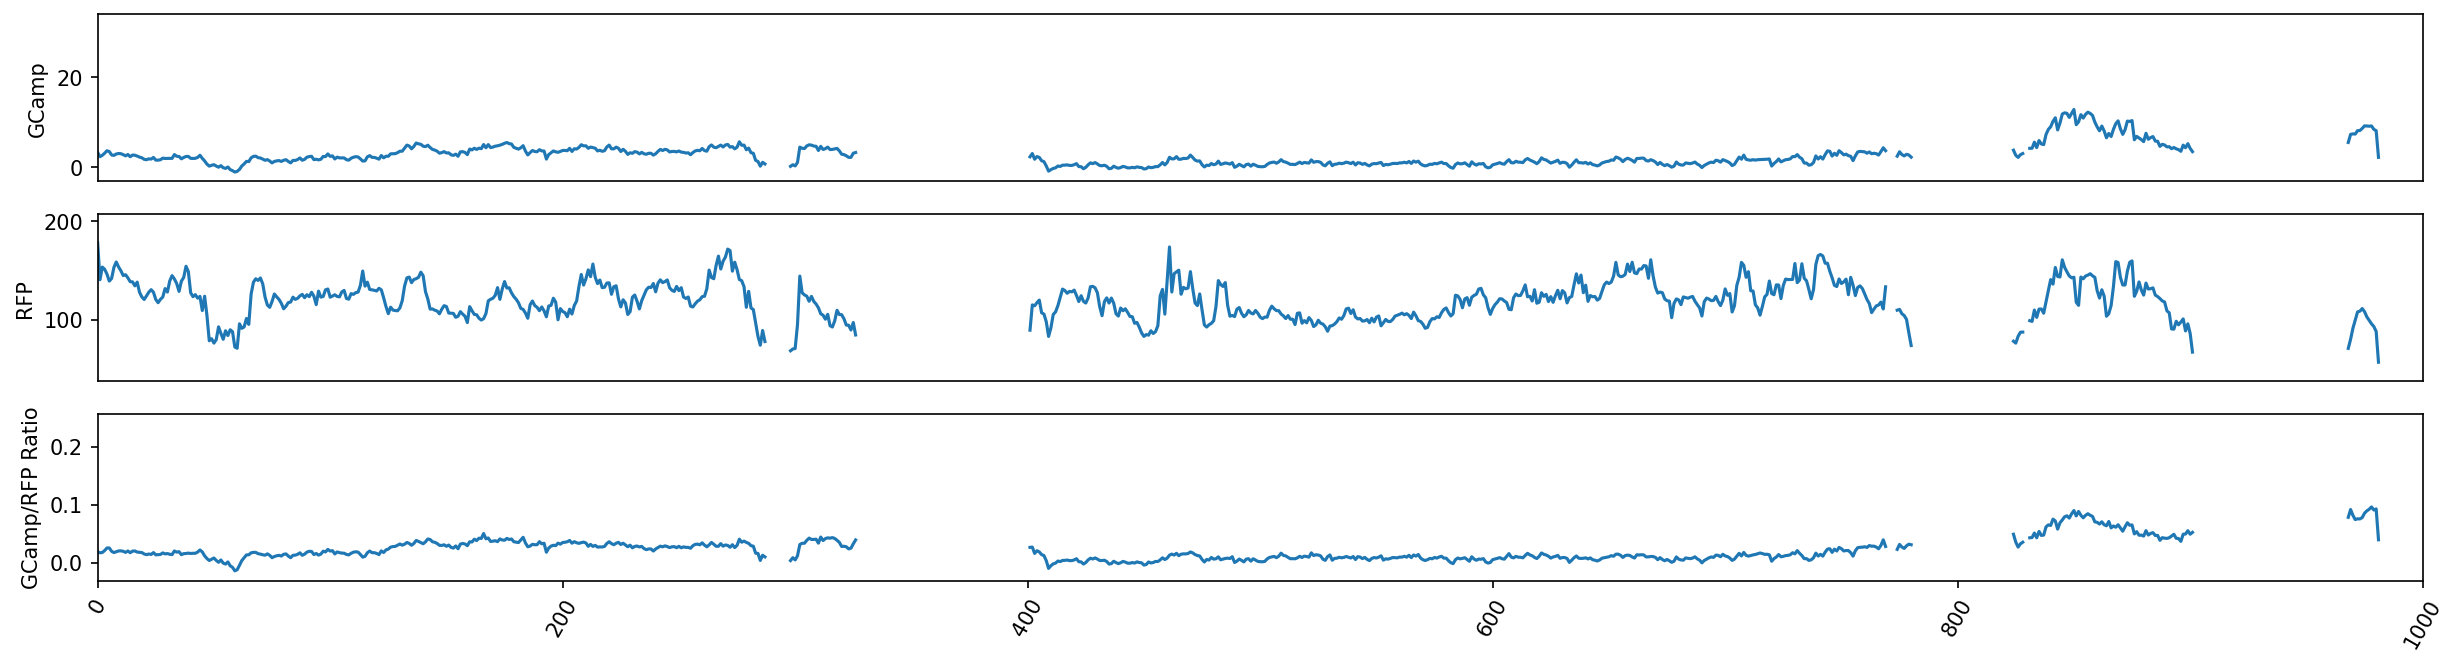

In [5]:
#function to calculate and plot the signal
rfp_mask_filepath='/scratch/zimmer/DanielM/BAG_RFP_max/binary/2021-07-20_15-13-27_bagworm3_on-channel-0rfp_raw_binary.btf'
gcamp_filepath='/scratch/zimmer/DanielM/BAG_GFP_max/BAG_GFP_MAX_CORRECTED/2021-07-20_15-13-27_bagworm3_on-channel-1.btf'
rfp_filepath='/scratch/zimmer/DanielM/BAG_RFP_max/2021-07-20_15-13-27_bagworm3_on-channel-0rfp_raw.btf'
background_gfp=104
background_red=104

#calculate signal
gcamp_signal, rfp_signal=ca_image.calculate_signal(rfp_filepath,rfp_mask_filepath,gcamp_filepath,background_red,background_gfp)

#plot signal
axes=ca_image.plot_gcamp_rfp_ratio(gcamp_signal,rfp_signal)

#some modifications to the plot
for i,ax in enumerate(axes):
    ax.set_xlim([0, 1000])
    if i<2: 
        ax.set_xticks([])
    if i==2:
        ax.tick_params(axis='x', labelrotation = 60)
            


### save the ratiometric signal as a csv

In [4]:
ratiometric_signal=gcamp_signal/rfp_signal
df=pd.DataFrame(ratiometric_signal)
#df.to_csv('/scratch/zimmer/DanielM/ratiometric_bagworm3.csv', index=None)
#df.plot()

### plot the ratiometric signal for all recordings

##### here i make lists containing paths to corresponding mask, rfp and gfp files

In [41]:
#make list of rfp path
rfp_path=Path(r'/scratch/zimmer/DanielM/BAG_RFP_max/')
counter=0
rfp_path_list=[]
for file in natsorted(os.listdir(rfp_path)):
     if file.endswith('raw.btf'):
        rfp_filepath=f'{rfp_path}/{file}'
        rfp_path_list.append(rfp_filepath)


In [43]:
#make list of gfp path
gcamp_path=Path(r'/scratch/zimmer/DanielM/BAG_GFP_max/BAG_GFP_MAX_CORRECTED/')
gcamp_path_list=[]
for file in natsorted(os.listdir(gcamp_path)):
     if file.endswith('.btf'):
        gcamp_filepath=f'{gcamp_path}/{file}'
        gcamp_path_list.append(gcamp_filepath)

In [44]:
#make list of rfp_mask path
rfp_path_mask=Path(r'/scratch/zimmer/DanielM/BAG_RFP_max/binary/')
rfp_path_mask_list=[]
for file in natsorted(os.listdir(rfp_path_mask)):
     if file.endswith('.btf'):
            mask_rfp_filepath=f'{rfp_path_mask}/{file}'
            rfp_path_mask_list.append(mask_rfp_filepath)
            counter=+1
            

### calculate and plot ratiometric signal for all worms

/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in doubl

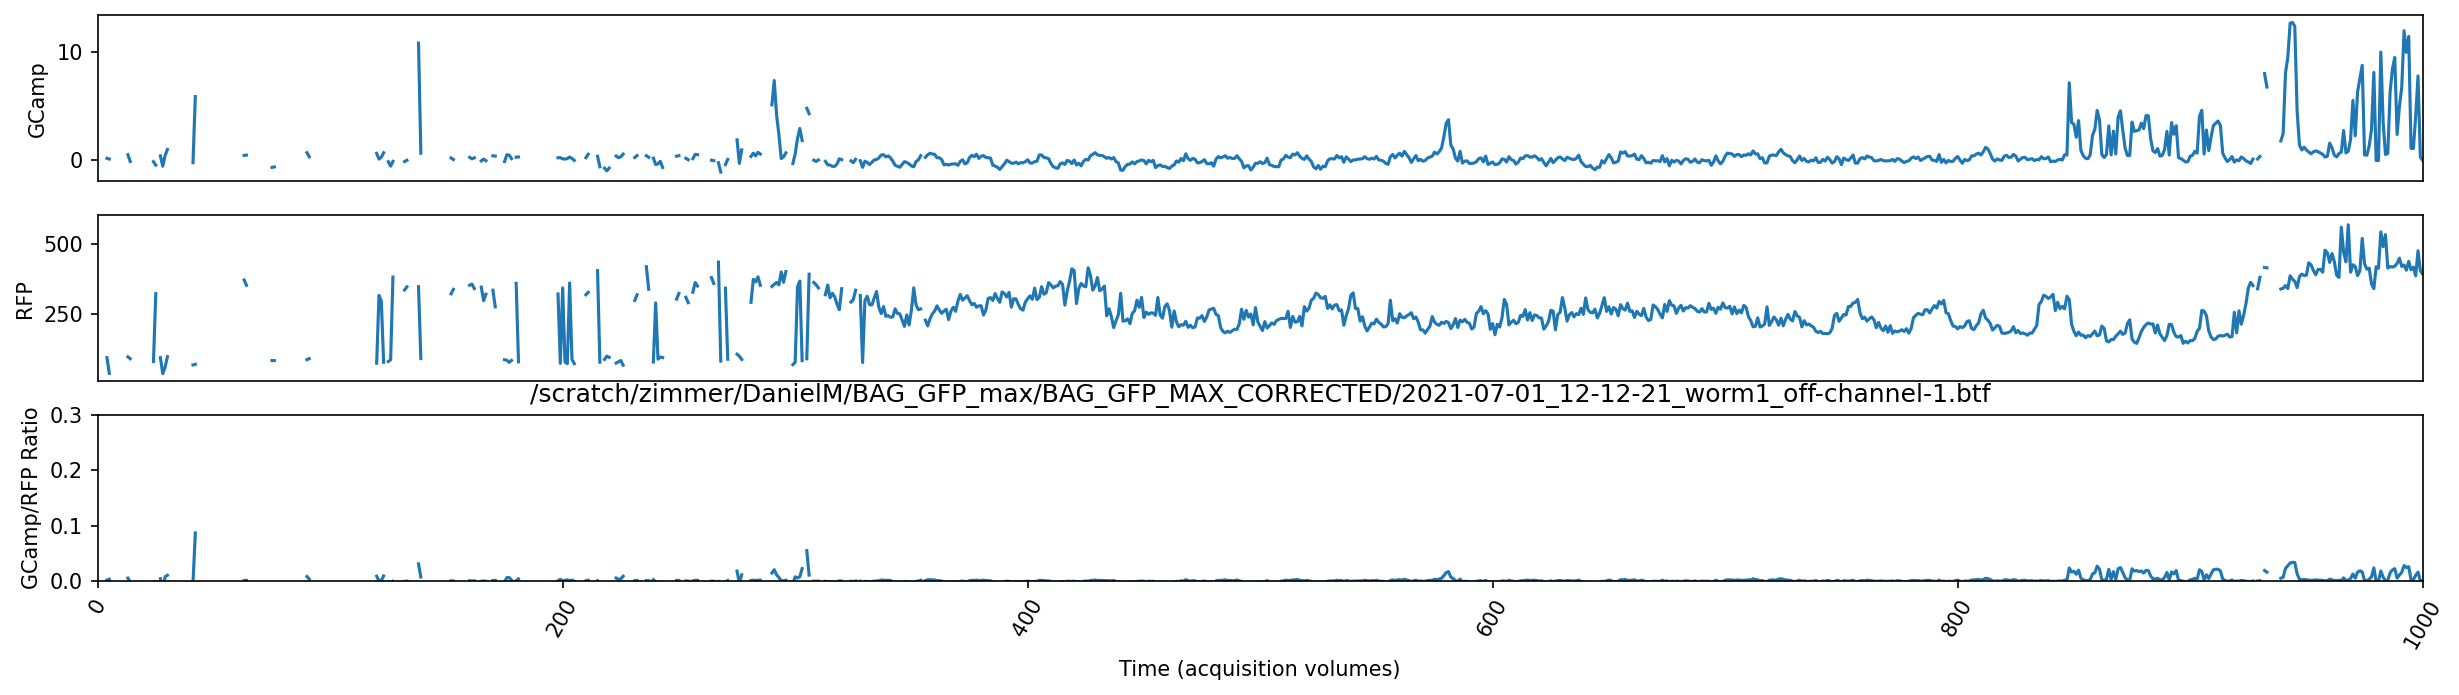

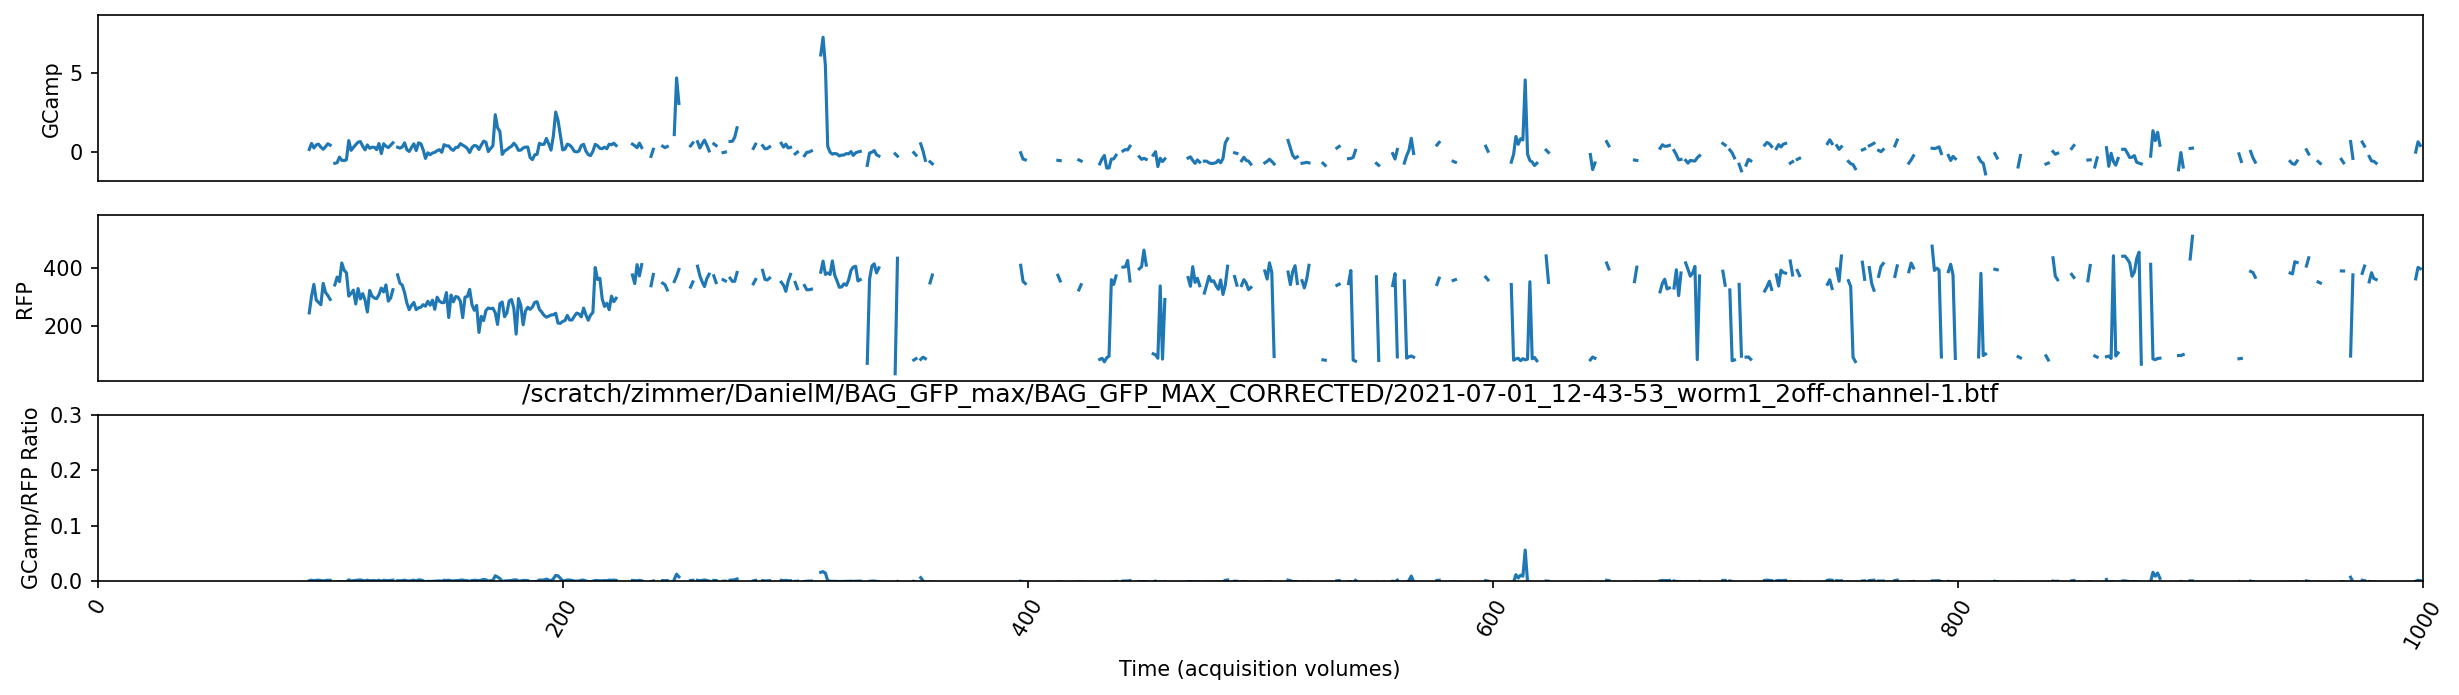

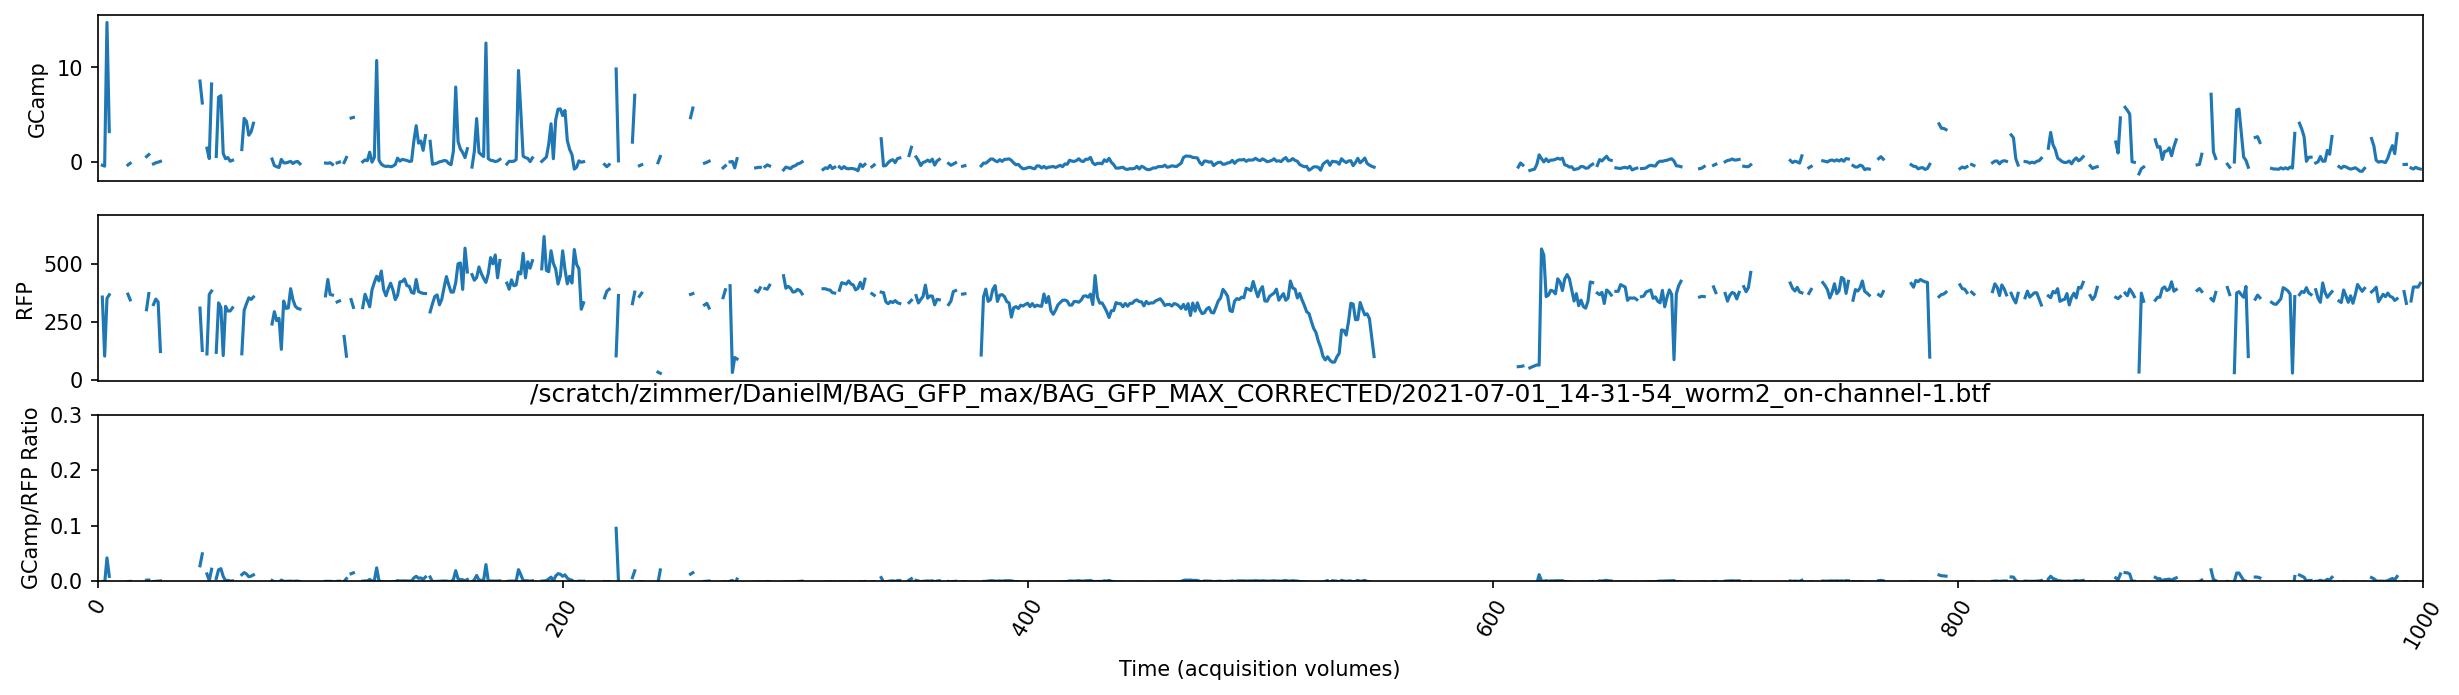

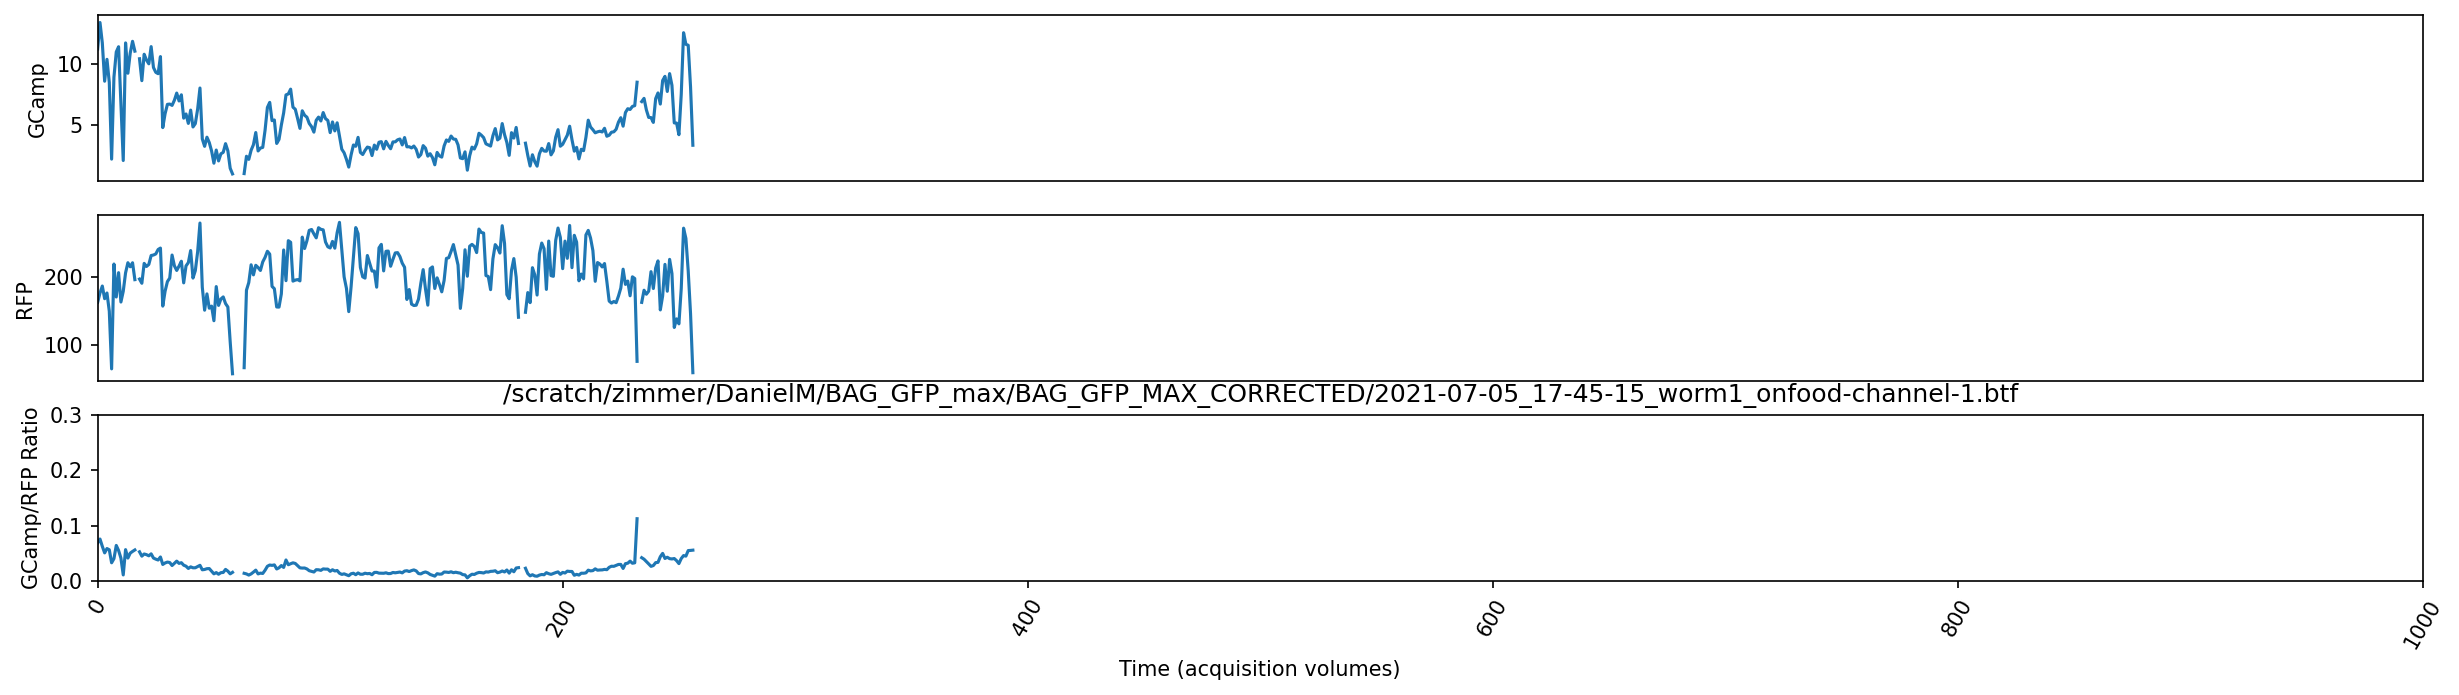

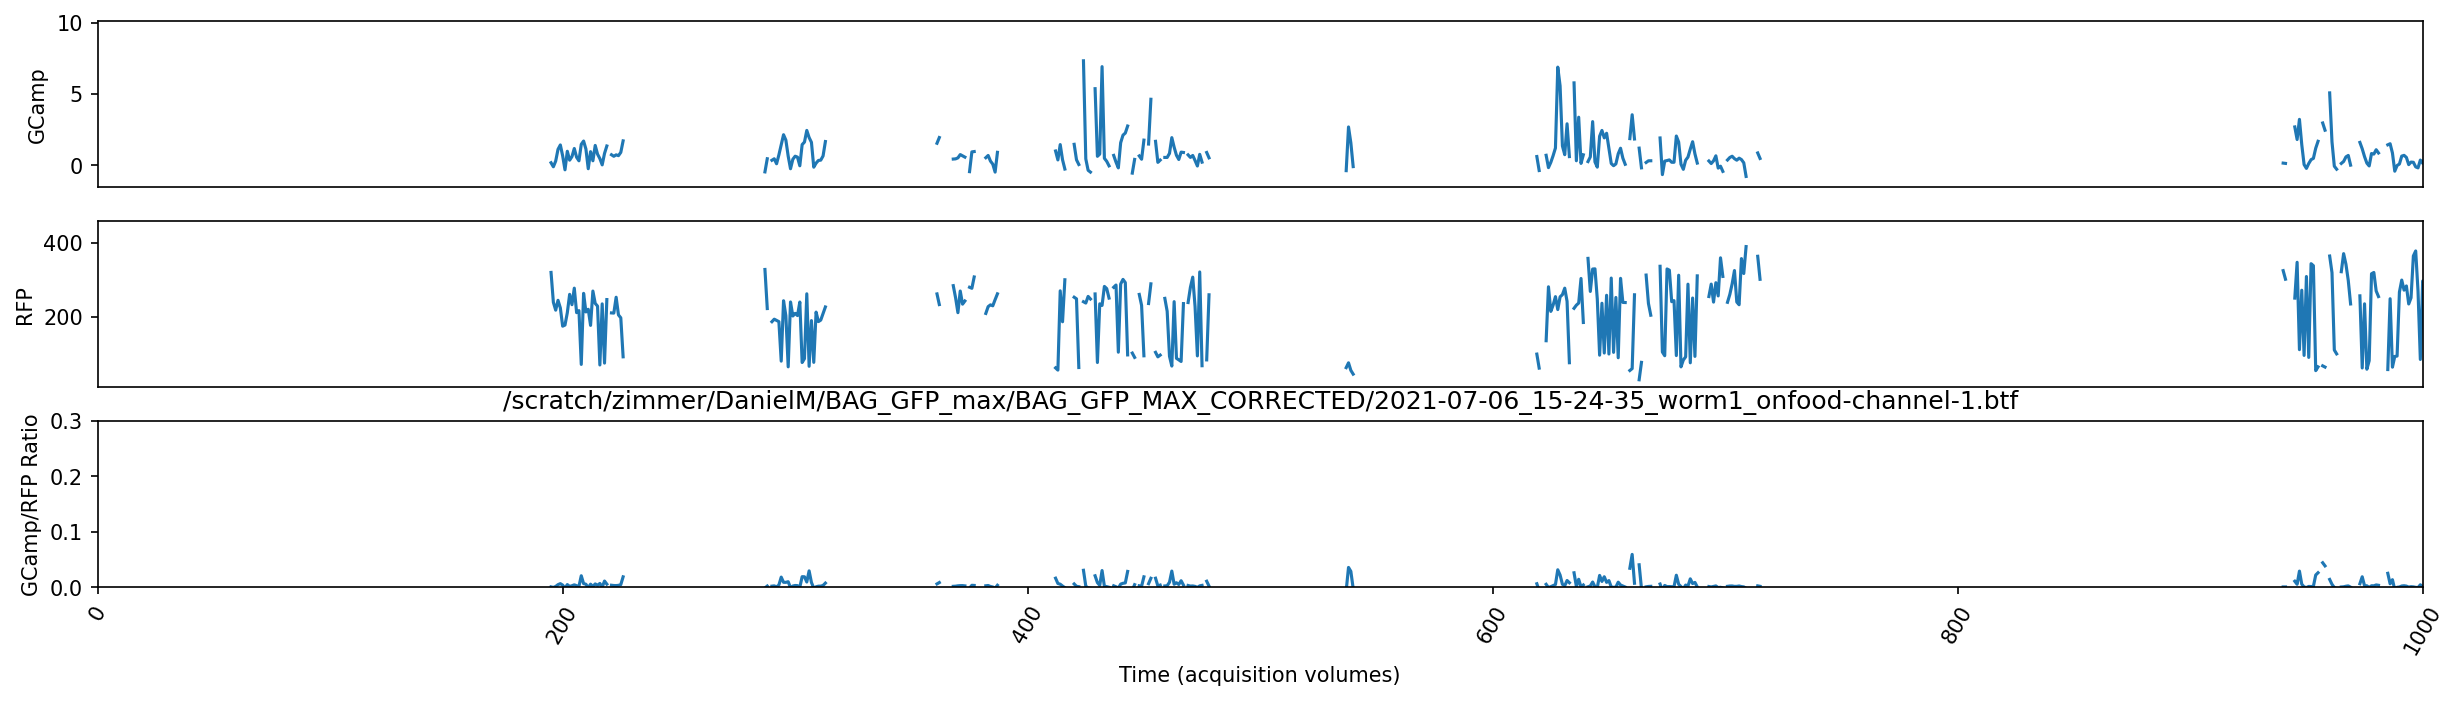

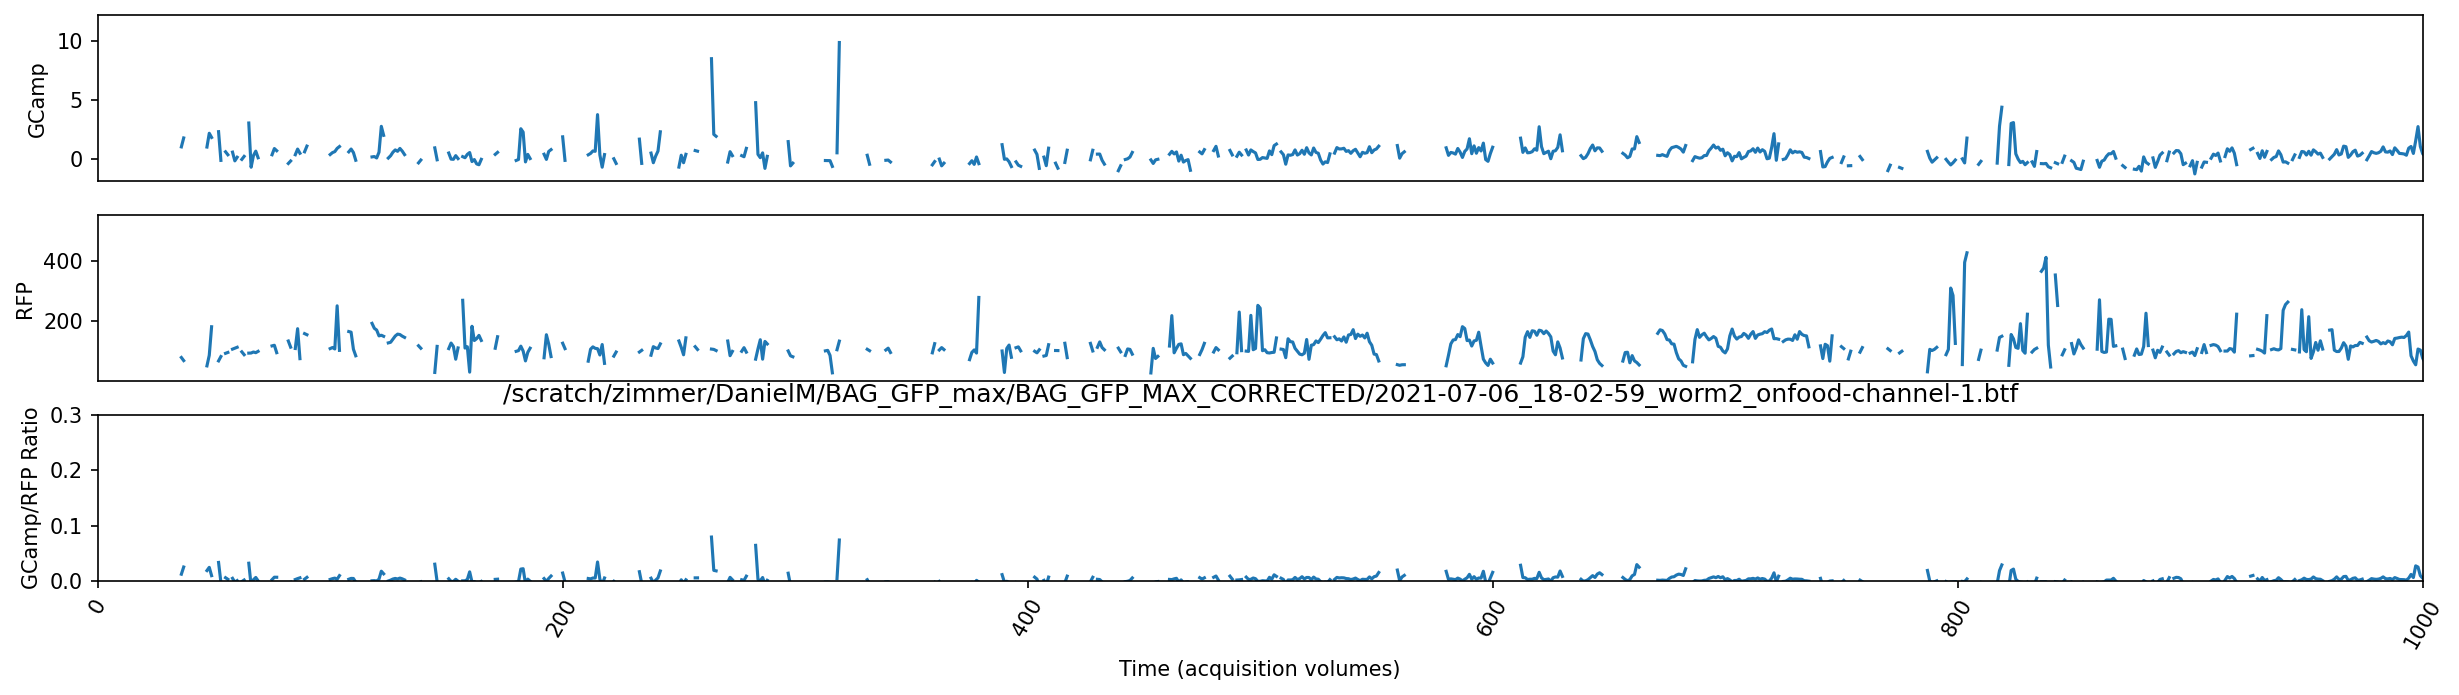

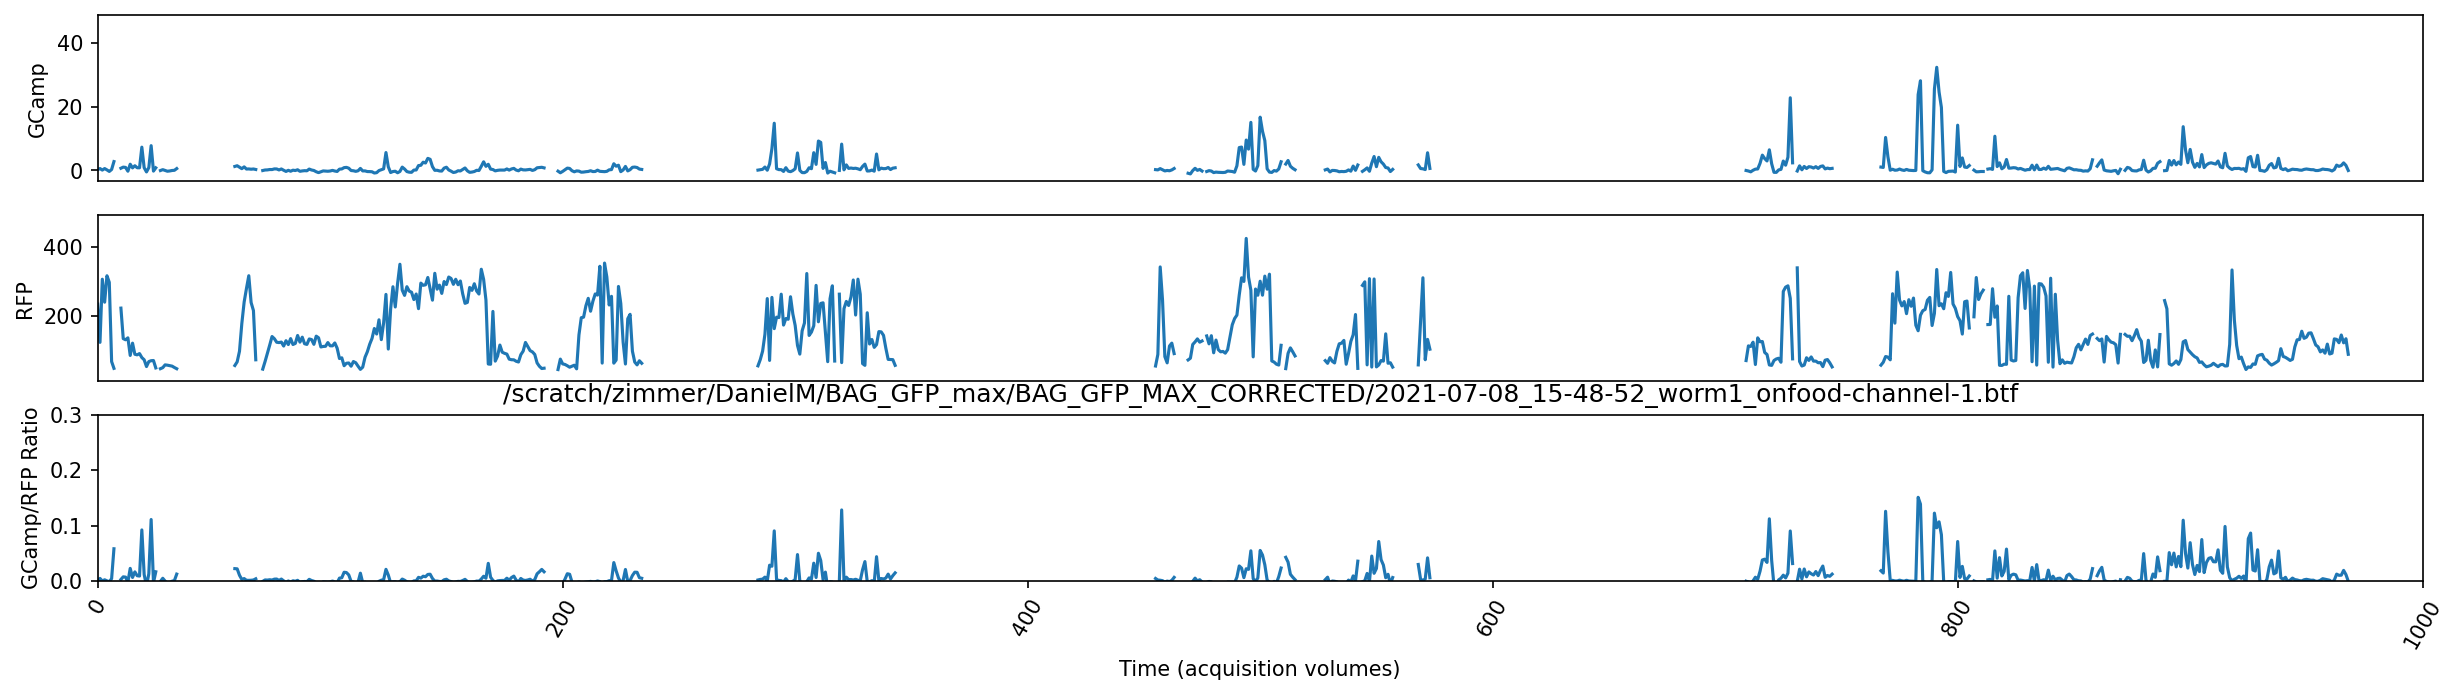

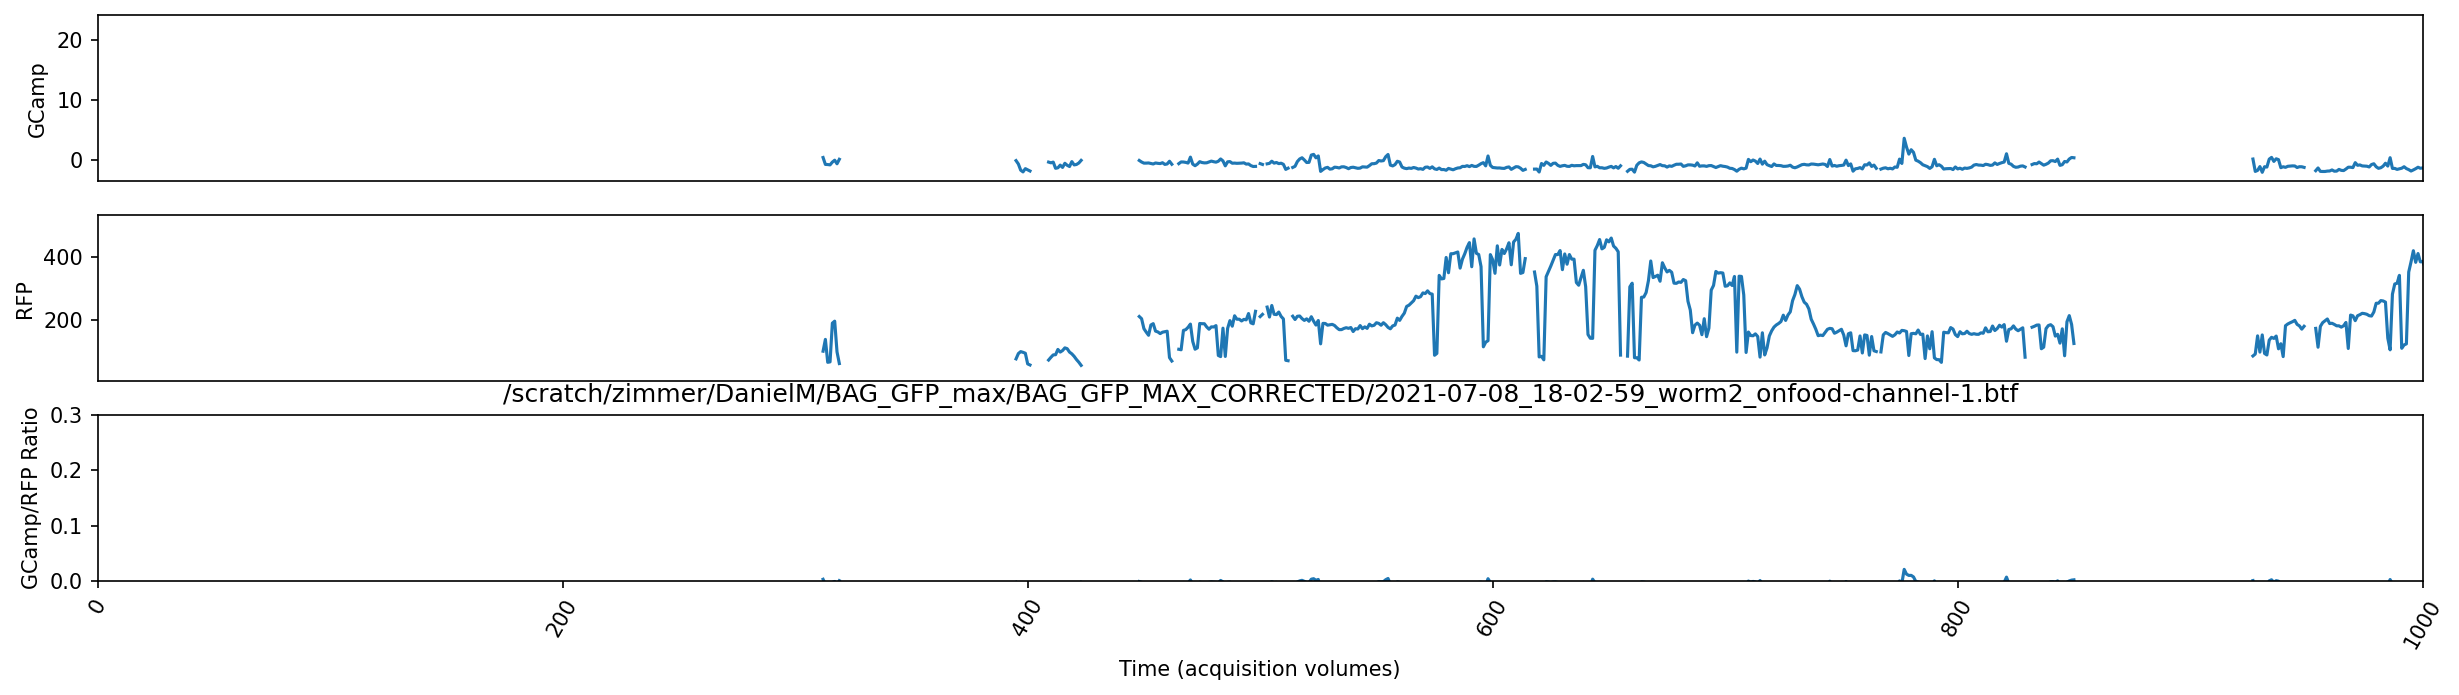

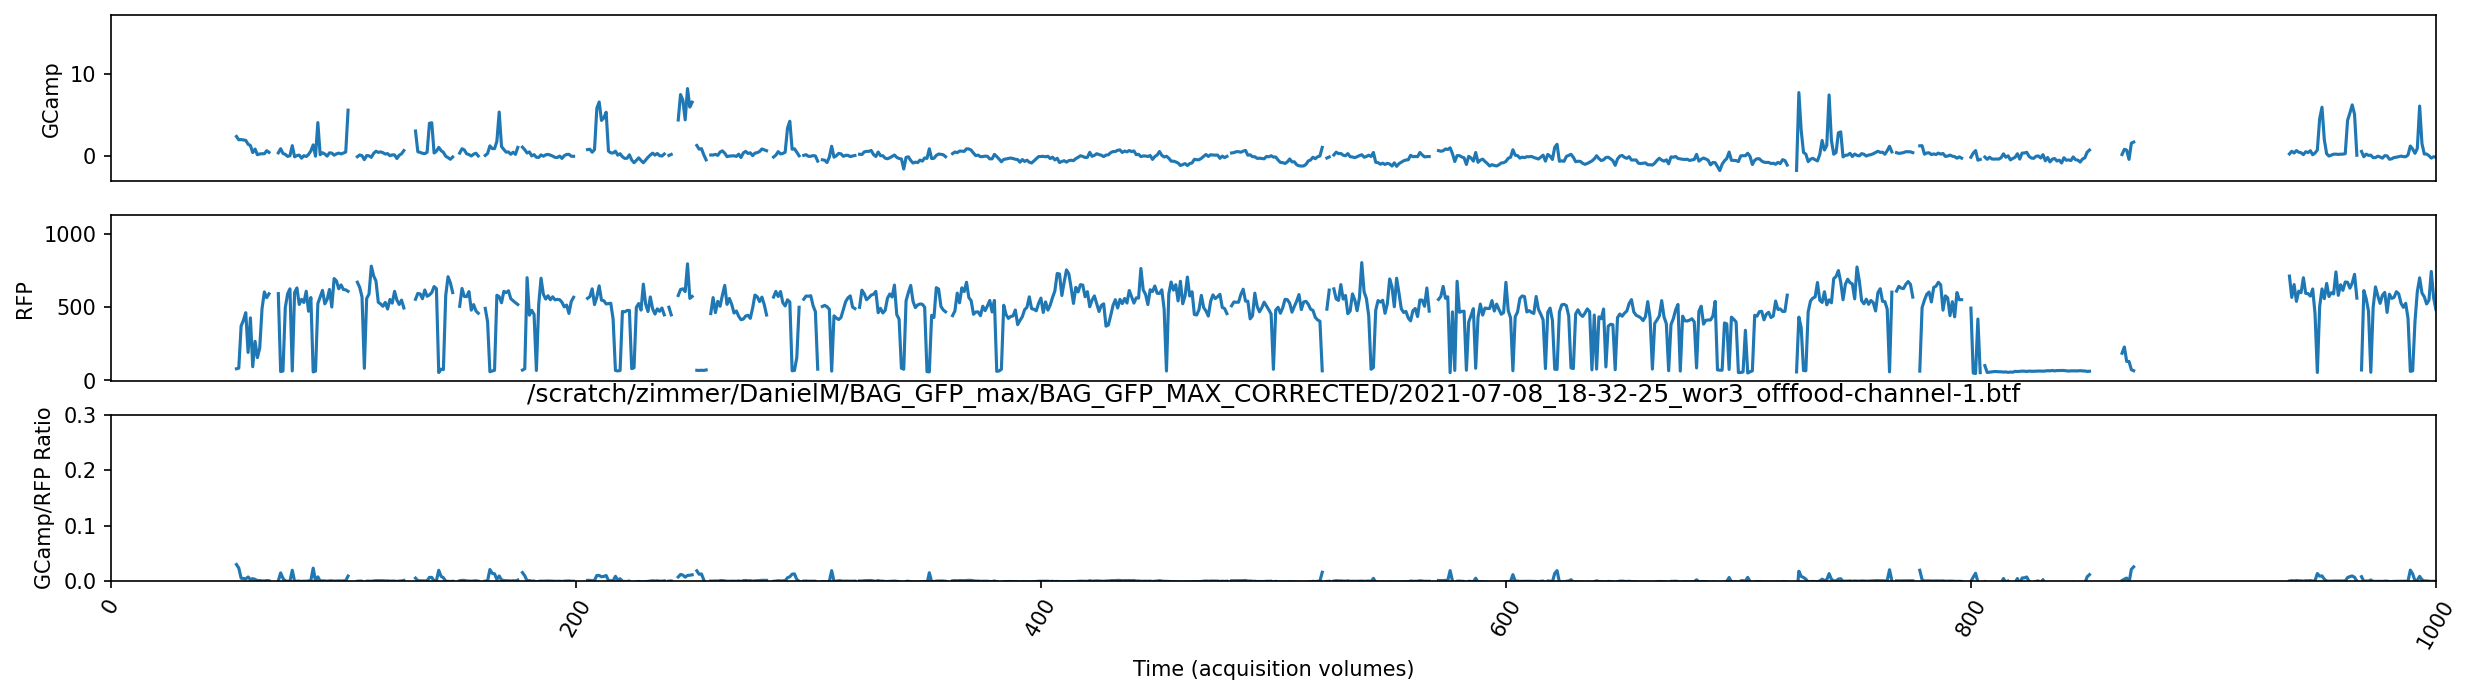

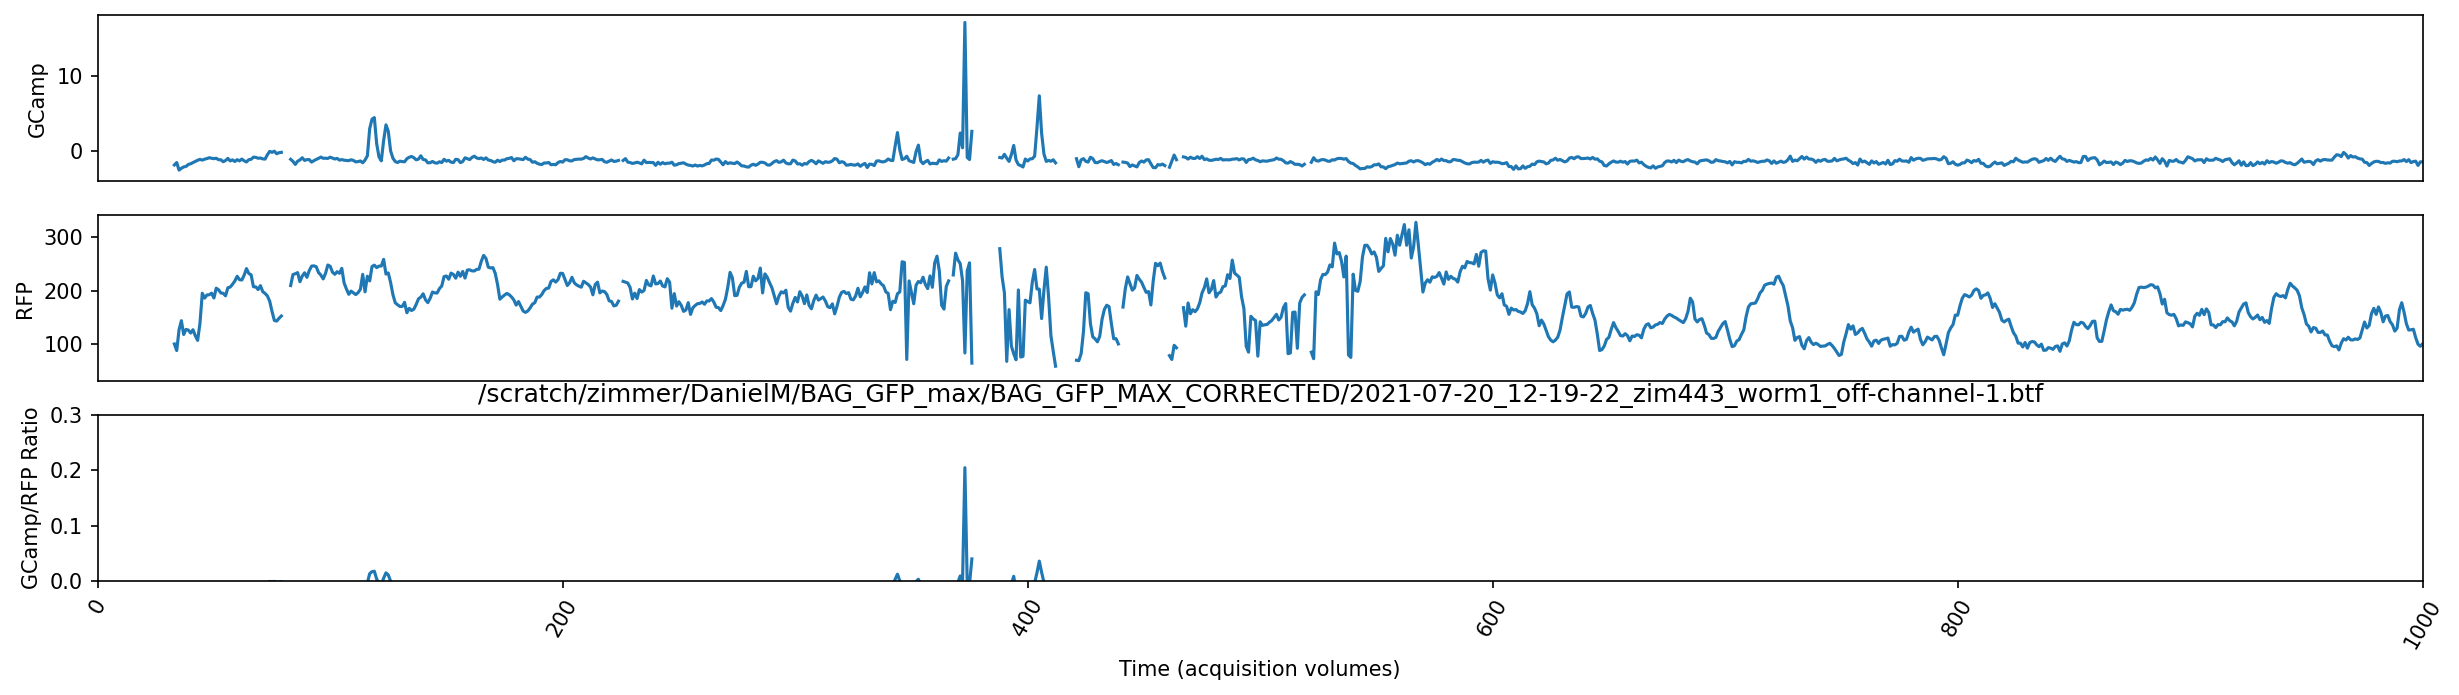

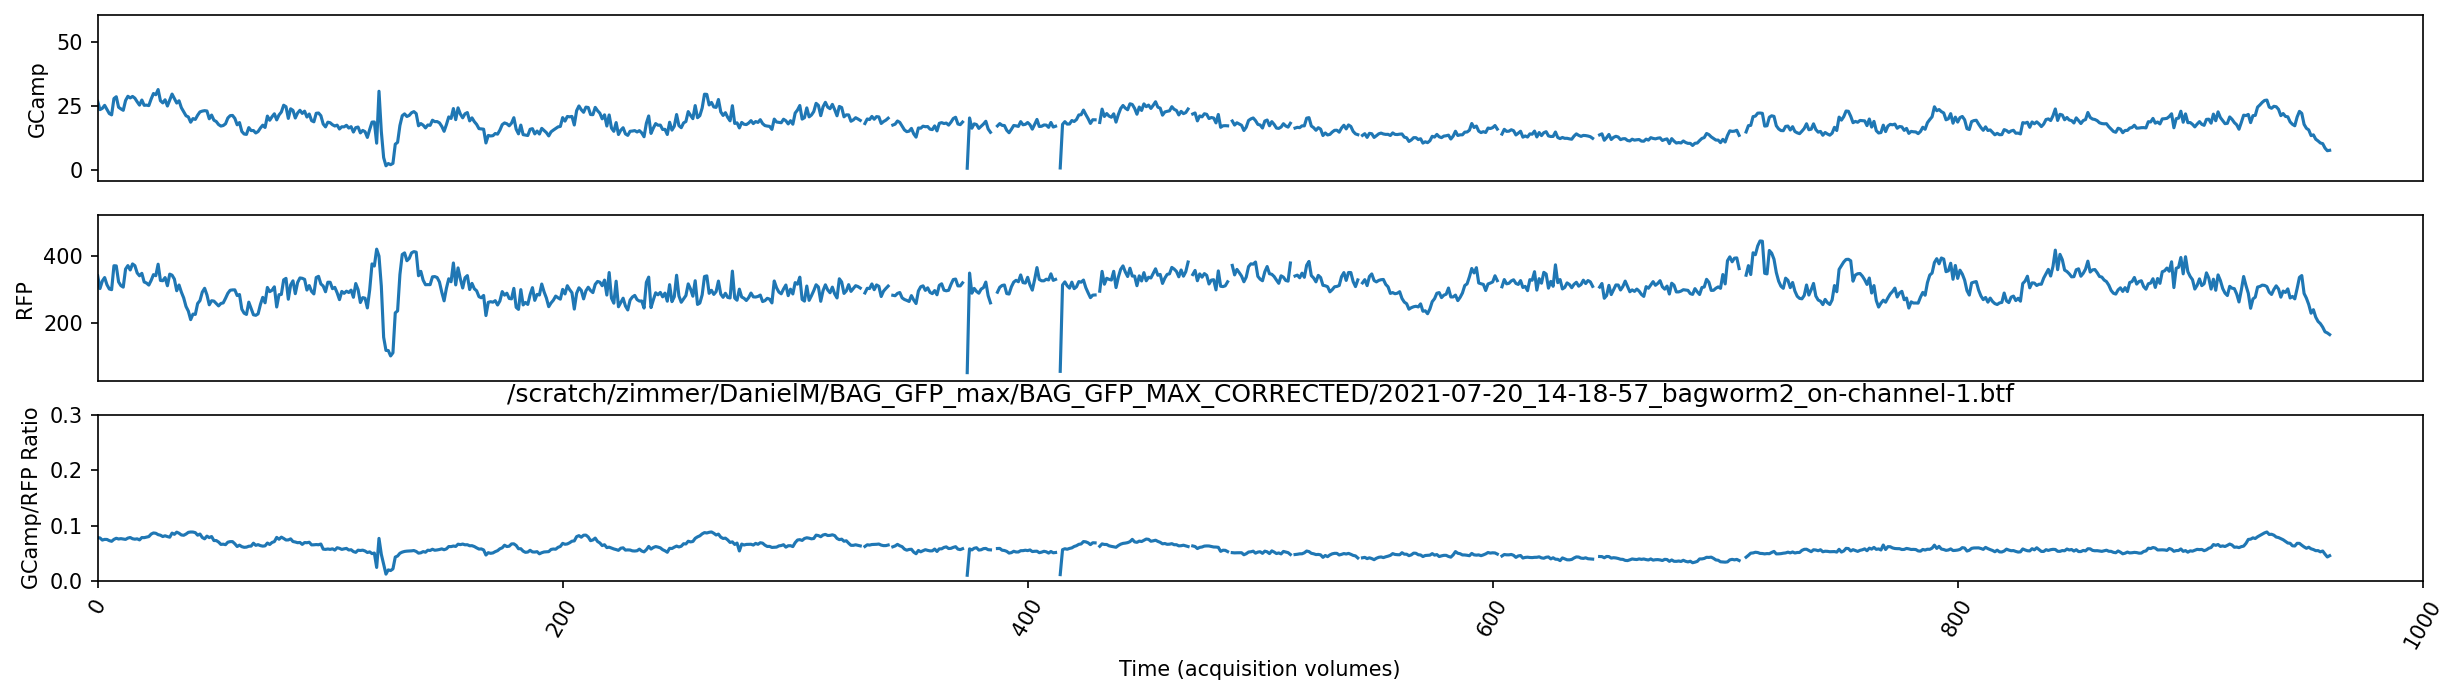

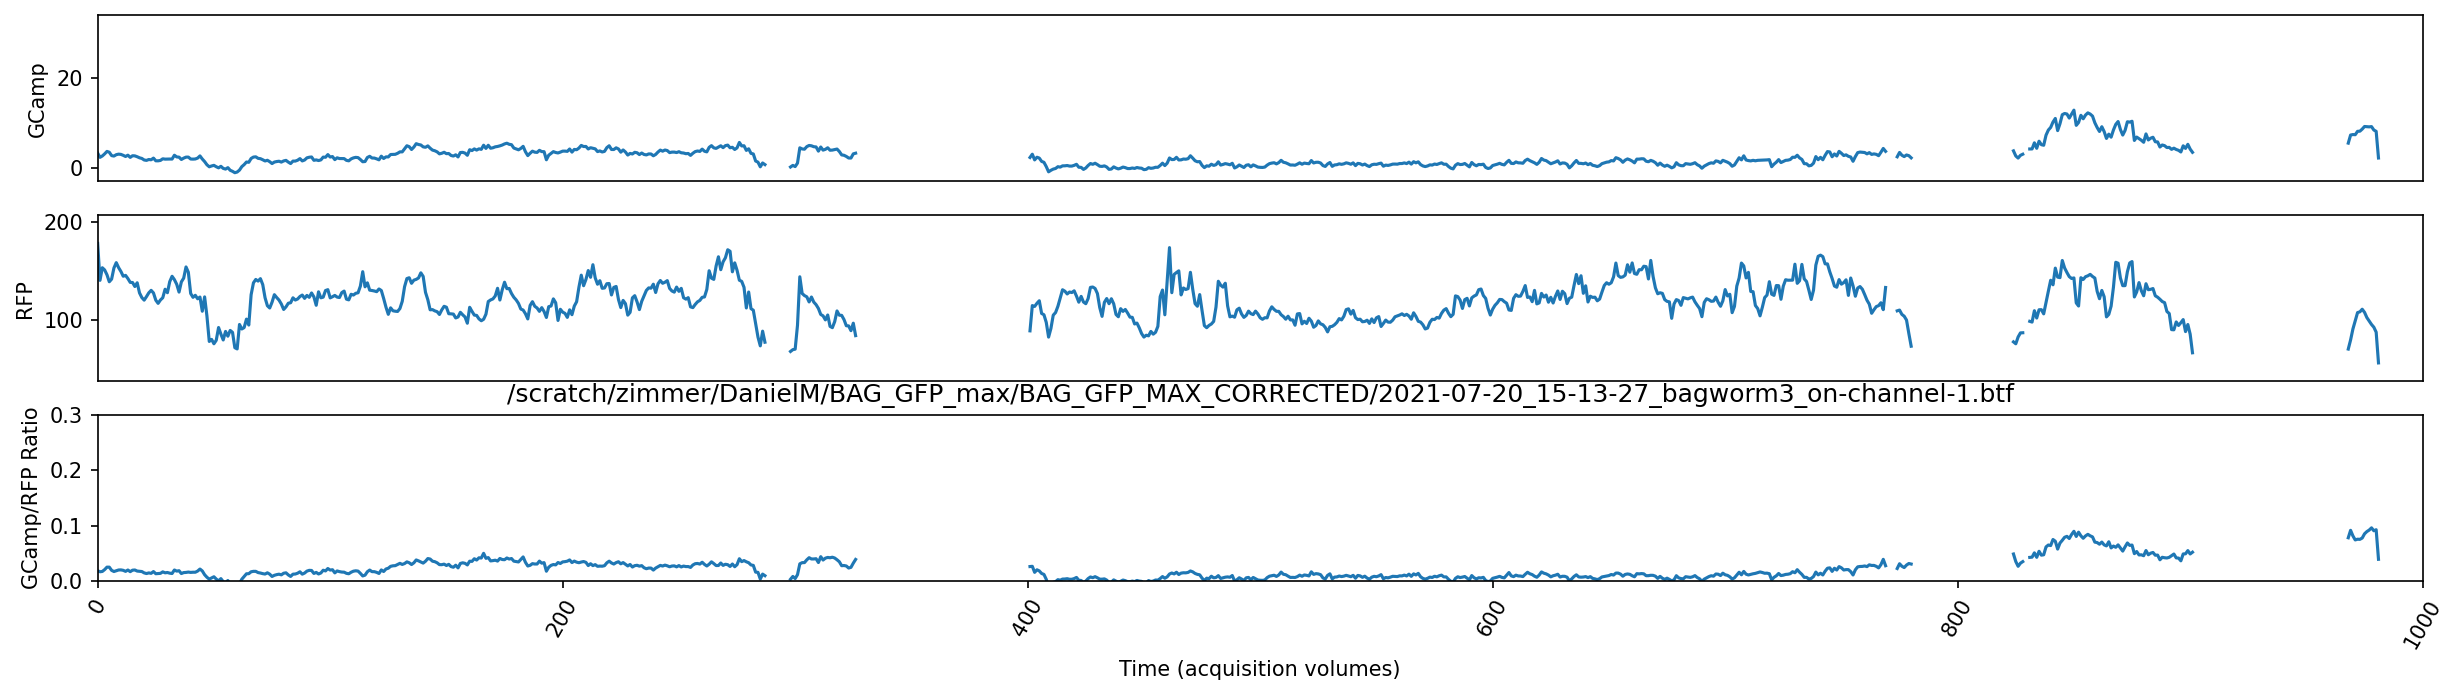

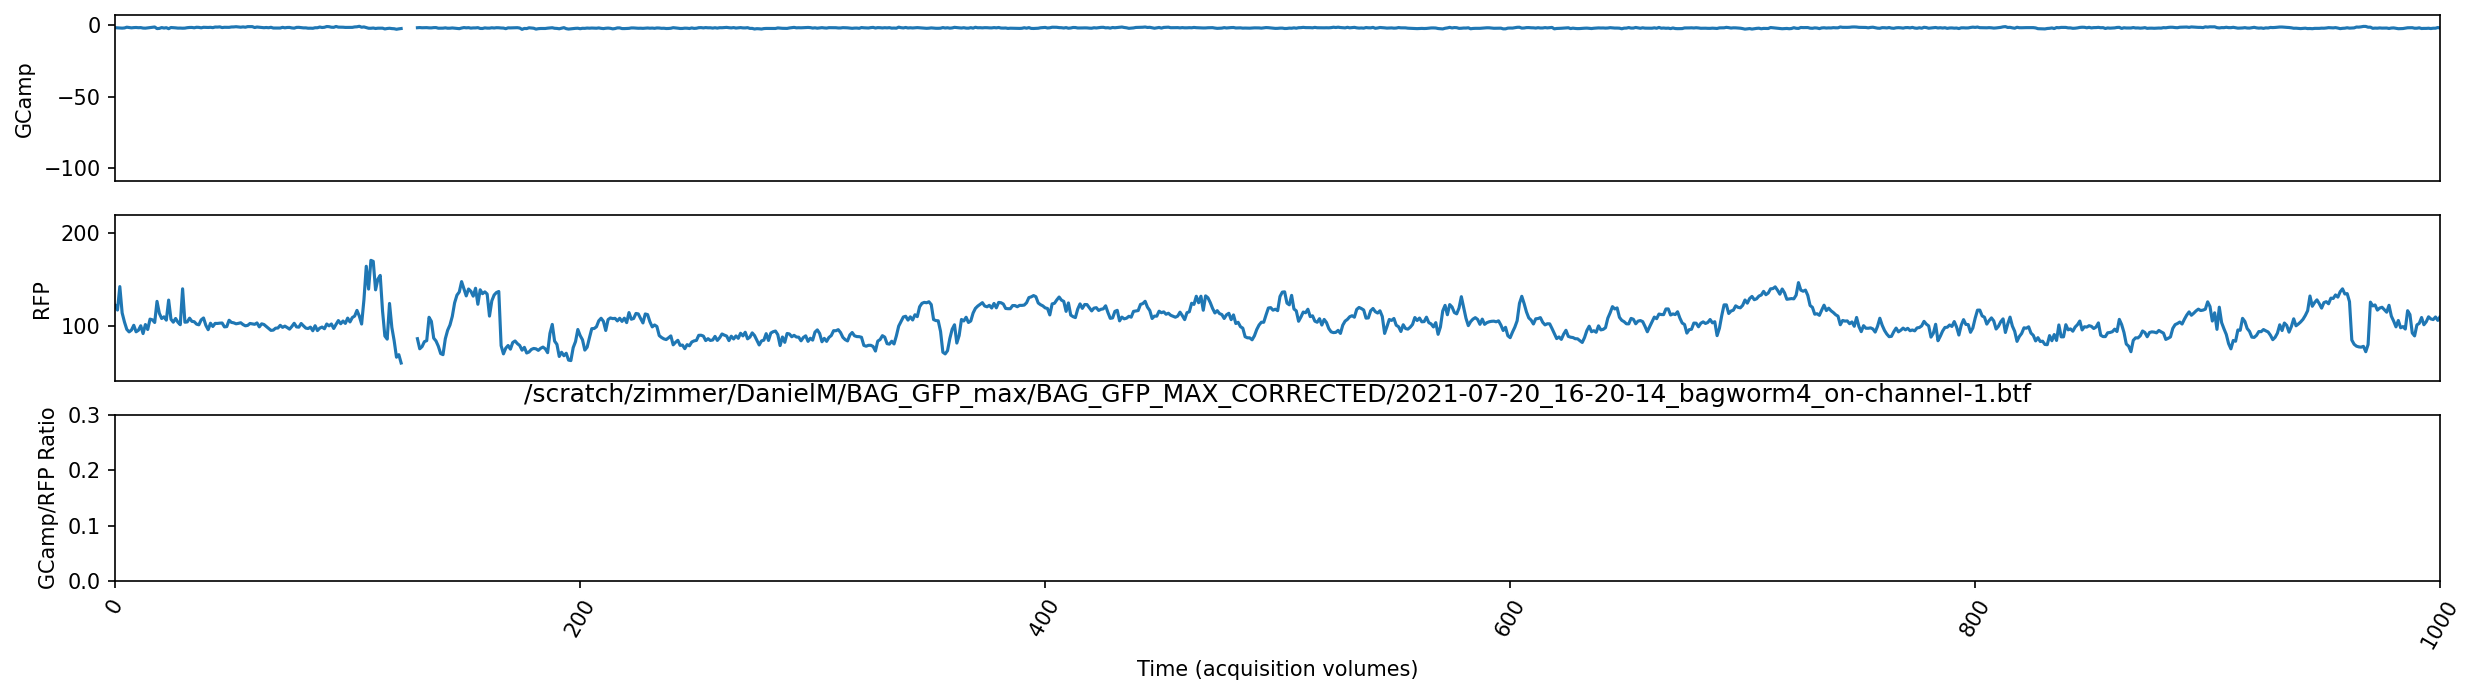

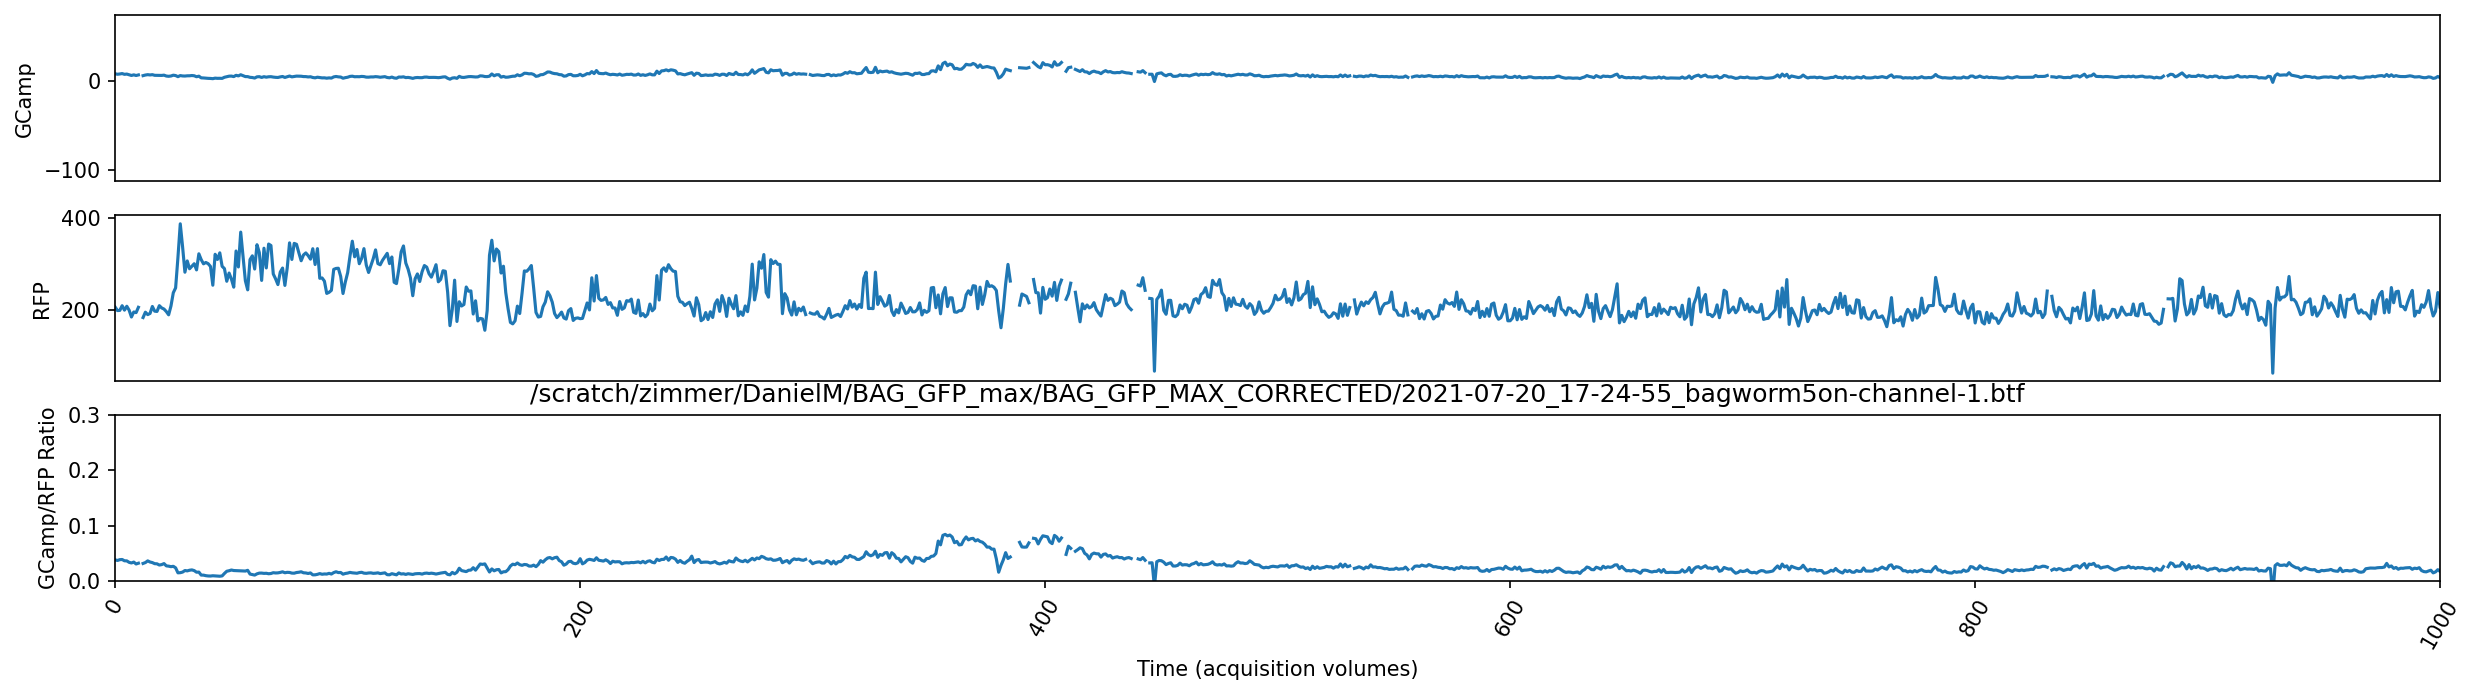

In [47]:
background=104
rfp_mask=Path(r'/scratch/zimmer/DanielM/BAG_RFP_max/_RFP_max/binary/')
for idx in range(len(gcamp_path_list)-1):
    rfp_mask_filepath=rfp_path_list[idx]
    gcamp_filepath=gcamp_path_list[idx]
    rfp_filepath=rfp_path_list[idx]
    rfp_mask_filepath=rfp_path_mask_list[idx]
    gcamp_signal, rfp_signal=calculate_signal(rfp_filepath,rfp_mask_filepath,gcamp_filepath,background)
    plot_gcamp_rfp_ratio(gcamp_signal,rfp_signal,low,high)
    plt.title(gcamp_path_list[idx])

(array([ 9., 17., 18., 33., 24., 17., 17.,  5.,  2.,  2.]),
 array([126. , 131.3, 136.6, 141.9, 147.2, 152.5, 157.8, 163.1, 168.4,
        173.7, 179. ]),
 <a list of 10 Patch objects>)

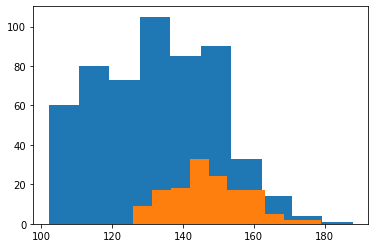

In [161]:
plt.hist(gcamp[roi])
plt.hist(gcamp[roi2])

(array([38., 34., 26., 23., 17.,  4.,  0.,  1.,  0.,  1.]),
 array([301. , 320.6, 340.2, 359.8, 379.4, 399. , 418.6, 438.2, 457.8,
        477.4, 497. ]),
 <a list of 10 Patch objects>)

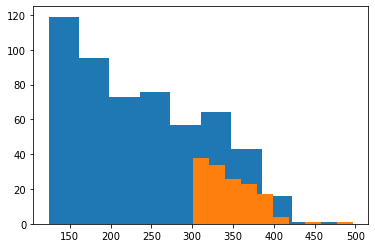

In [162]:
plt.hist(rfp[roi])
plt.hist(rfp[roi2])


In [157]:
#convert list to numpy array
gcamp_signal=np.array(gcamp_signal)
rfp_signal=np.array(rfp_signal)


In [40]:
#remove background (TODO: improve background calculation)
gcamp_signal=gcamp_signal-104
rfp_signal=rfp_signal-104

In [76]:
#find frames where there is no signal
np.where(np.isnan(gcamp_signal))

(array([ 288,  289,  290, ..., 9980, 9981, 9982]),)

In [77]:
#check % of frames without signal
np.isnan(gcamp_signal).sum()/gcamp_signal.shape[0]

0.3439847741159972

### Stack Subsampling

For instance the behaviour to have same number of frames as max projections (default is number of frames == total number of planes)

In [ ]:
input_filepath='/scratch/zimmer/DanielM/BAG_Gcamp_07_01/btf_all/bh/2021-07-01_15-10-32_worm3_on-channel-0-behaviour-bigtiff.btf'
output_filepath='/scratch/zimmer/DanielM/hyperstack/2021-07-01_15-10-32_worm3_on-channel-0-behaviour-bigtiff_subsampled.btf'
with tiff.TiffFile(input_filepath, multifile=False) as tif,\
 tiff.TiffWriter(output_filepath, bigtiff=True) as tif_writer:
    for i, page in enumerate(tif.pages):
        if i %20==0:
            img=page.asarray()
            tif_writer.write(img,contiguous=True)
            